<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
%%capture
import sys

!"{sys.executable}" -m pip install phik

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from sklearn.metrics import r2_score

In [3]:
try:
     df = pd.read_csv(r"C:\Проекты Яндекс.Практикум\10. Линейная алгебра. Страховые выплаты\Датасет\insurance.csv")
except: 
    df = pd.read_csv('/datasets/insurance.csv')

In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df['Пол'].unique()

array([1, 0], dtype=int64)

In [7]:
df['Возраст'].sort_values().unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 65.])

In [8]:
df['Зарплата'].describe()

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64

In [9]:
df['Члены семьи'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [10]:
df['Страховые выплаты'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [11]:
df.duplicated().sum()

153

Загружены необходимые библиотеки и датасет. 

Таблица состоит из пяти колонок: 

- Пол
- Возраст
- Зарплата
- Члены семьи 
- Страховые выплаты

Всего 5000 строк, без пропусков. Есть 153 полных дубликата, но так как признаков всего 5, то данные могут повторяться и у разных людей. Удалять дубликаты не будем.

Посмотрели уникальные значения по каждому столбцу, чтобы убедиться, что нет очевидно нереалистичных значений.

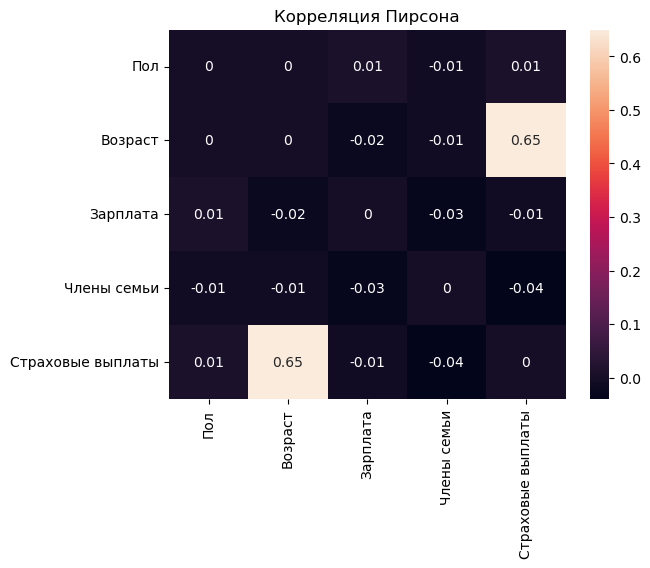

In [12]:
corr_mat = round(df.corr(),2)
# Построили корреляционную матрицу и округлили значения

for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
#убрали единицы из диагонали, чтобы они не мешали отфильтровать максимальные значения
    
sns.heatmap(corr_mat,  annot=True)
plt.title('Корреляция Пирсона')
plt.show()

Построили матрицу корреляции Пирсона, чтобы посмотреть на взаимосвять признаков между собой, а также на целевой признак. Самое заметное влияние возраста на количество страховых выплат, равное 0.65. В остальных случаях зависимость стремится к нулю.

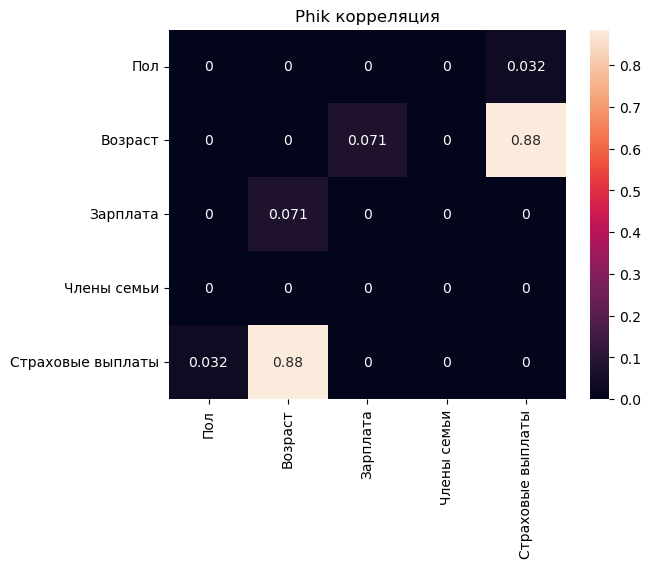

In [13]:
interval_cols = ['Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты' ]
phik_overview = df.phik_matrix(interval_cols=interval_cols)
for x in range(phik_overview.shape[0]):
    phik_overview.iloc[x,x] = 0.0
sns.heatmap(phik_overview,  annot=True)
plt.title('Phik корреляция')
plt.show()

Построили матрицу Phik корреляции. На ней зависимость возраста на количество страховых выплат еще заметнее и стремится  к 1. 

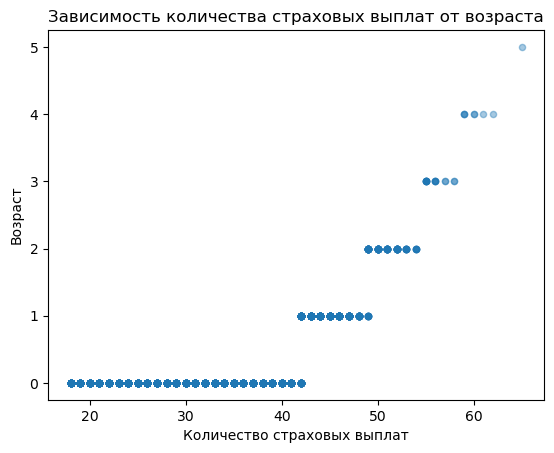

In [14]:
df.plot(x='Возраст', y='Страховые выплаты', kind='scatter', alpha=0.4) 
plt.xlabel('Количество страховых выплат')
plt.ylabel('Возраст')
plt.title('Зависимость количества страховых выплат от возраста')
plt.show()

Построили диаграмму рассеяния, чтобы рассмотреть влияние возраста на страховые выплаты более пристально. Видим, что с возрастом количество страховых выплат увеличивается. В возрасте с 18 до 42-43 у людей не наблюдаются выплаты. Можно предположить, что за более долгую жизнь, у человека произошло больше событий и отсюда больше выплат. 

In [15]:
pd.options.display.float_format = '{:,.2f}'.format
max(df['Возраст'] % 1)

0.0

Проверили в столбце Возраст, имеющем тип float, дробную часть значений. Все значения целые.

In [16]:
pd.options.display.float_format = '{:,.2f}'.format
max(df['Зарплата'] % 1)

0.999999999992724

Проверили в столбце Зарплата, имеющем тип float, дробную часть значений. Все значения целые

In [17]:
df['Пол'] = df['Пол'].astype(np.int8)

In [18]:
df['Возраст'] = df['Возраст'].astype(np.int8)

In [19]:
df['Зарплата'] = round(df['Зарплата']).astype(np.int32)

In [20]:
df['Члены семьи'] = df['Члены семьи'].astype(np.int8)

In [21]:
df['Страховые выплаты'] = df['Страховые выплаты'].astype(np.int8)

In [22]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int8 
 1   Возраст            5000 non-null   int8 
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int8 
 4   Страховые выплаты  5000 non-null   int8 
dtypes: int32(1), int8(4)
memory usage: 39.2 KB


У всех столбцов поменяли тип данных. В том числе для экономии ресурсов. Все столбцы кроме зарплаты имеют значения в диапазоне до 127, поэтому могут быть переведены в тип int8. Столбец Зарплата по своим максимальным значениям можно перевести в int32. Так

## Умножение матриц

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**При умножении признаков на обратимую матрицу качество линейной регрессии не изменится**

**Обоснование:**  

$$
w = (X^T X)^{-1} X^T y
$$

Умножим X на обратимую матрицу P и рассчитаем, чему в такому случае будет равен вектор весов, который обозначим заглавной буквой W

$$
W = ((PX)^T XP)^{-1} (PX)^T y 
$$

Раскроем скобки


$$
W = P^{-1} (X^T X)^{-1} (P^T) ^{-1} P^T  X^T y 
$$


Умножение матрицы на обратную равно единичной матрице (E), в нашем случае это 

$$
(P^T) ^{-1}P^T = E
$$

Значит

$$ 
W = P^{-1} (X^T X)^{-1} E X^T y 
$$

В то же время матрица, умноженная на единичную матрицу равна сама себе, значит E можем сократить

$$ 
W = P^{-1} (X^T X)^{-1} X^T y 
$$

Внутри видим знакомую комбинацию $$(X^T X)^{-1} X^T y $$ , равную w

Заменим в формуле

$$
W =  P^{-1}w
$$

Подставим значение вектора весов W  в формулу предсказания

$$
a = XP P^{-1}w
$$

так как $$ P P^{-1} = E$$ и Е сокращается, то

$$
a = Xw
$$

**Вывод:** Умножение признаков на обратимую матрицу не изменяет предсказание, а значит не влияет на качество линейной регрессии

## Алгоритм преобразования

**Алгоритм**

Умножим признаки на обратимую матрицу

**Обоснование**

Создадим матрицу из случаныйх чисел, так чтобы высота матрицы была равна ширине матрицы признаков, то есть 4. Матрица будет квадратной, так как только для квадратной матрицы можно вычислить обратную.  

- Умножая матрицу признаков на любую квадратную обратимую матрицу, мы получаем новую матрицу признаков. Эта новая матрица с зашифрованными значениями. То есть понять по ней какая у человека реальная зарплата или количество детей (как в нашем датасете) мы не сможем. Данные защищены.
- На первый взгляд это уже новые признаки и предсказания по ним должны получиться другие.
- Посмотрим на один из последних этапов доказательства раздела выше  $$ a = XPwP^{-1} $$ Именно здесь  видно, что в в предсказании происходит умножение нашей матрицы-ключа на обратную ей, в резльтате получается единица, не влияющая на результат и значение предсказаний не изменяется. Поэтому мы и используем обратимую матрицу, чтобы в определенных моментах она превратилась в единицу.
- Если мы захотим посмотреть реальные данные признаков (Х), нам понадобятся матрица зашифрованных данных (D, если XP = D) и матрица-ключ (P). Операция "деление" между матрицами не предусмотрена и логичное X = D/P, нам провести не удастся. Но деление заменяют умножение на обратную матрицу. То есть $$ X = D P^{-1} $$
- Выходит, имея зашифрованнкю матрицу и матрицу-ключ, к которой мы вычислим обратную, мы можем вычислить и матрицу реальных признаков

In [24]:
def rev_m (random, count, size_1):
    try:
        r= np.random.RandomState(random)
        random_m = r.randint(count, size = (size_1, size_1))
        rev_matrix = np.linalg.inv(random_m)
        return rev_matrix
    except:     
        return rev_m ()  
    

count = 10
size_1 = 4
random = 42


reverse_matrix = rev_m (random = random , count=count, size_1=size_1)
reverse_matrix

array([[-0.34048257,  0.07238606, -0.18766756,  0.56032172],
       [ 0.03217158,  0.17426273, -0.15549598, -0.02144772],
       [ 0.31367292, -0.05093834, -0.01608579, -0.20911528],
       [ 0.18766756, -0.15013405,  0.42627346, -0.45844504]])

Создали функцию для создания обратимой матрицы. И сразу создали обратимую матрицу, которую будем использовать в качестве ключа далее

Отделим признаки от целевого признака, а также отдельно запишем признаки, умноженные на обратимую матрицу.

In [25]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [26]:
reverse_features = features.dot(reverse_matrix)

## Проверка алгоритма

In [27]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [28]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, round(predictions)))

0.6270326719379382


In [29]:
model = LinearRegression()
model.fit(reverse_features, target)
predictions_reverse = model.predict(reverse_features)
print(r2_score(target, round(predictions_reverse)))

0.6270326719379382


In [30]:
print(r2_score(target, predictions) - r2_score(target, predictions_reverse))

7.882583474838611e-14


Создали и обучили модель:
- на обучающей выборке
- на обучающей выборке, с признаками, умноженными на обратимую матрицу.
Рассчитали значение метрики R2 для обеих версий. Разница в значениях минимальная, при вычетании равна нулю.

**Вывод:** Умножение признаков на обратимую матрицу позволяет защитить данные клиента без потери качества модели.

Проверим, что с помощью матрицы-ключа, можно расшифровать признаки

D = predictions_reverse, P = reverse_matrix

In [31]:
reverse_features.head()

,0,1,2,3
0,"15,559.34","-2,519.47",-803.99,"-10,372.90"
1,"11,921.24","-1,927.79",-617.99,"-7,947.83"
2,"6,588.06","-1,064.65",-342.31,"-4,392.04"
3,"13,081.21","-2,120.77",-673.19,"-8,721.47"
4,"8,187.42","-1,324.54",-424.38,"-5,457.95"


In [32]:
np.linalg.inv(reverse_matrix)

array([[6., 3., 7., 4.],
       [6., 9., 2., 6.],
       [7., 4., 3., 7.],
       [7., 2., 5., 4.]])

In [33]:
x = round(reverse_features@np.linalg.inv(reverse_matrix)).astype(int)

x.columns = ["Пол", "Возраст", 'Зарплата', 'Члены семьи']
x.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [34]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


In [35]:
(features != x).sum()

Пол            0
Возраст        0
Зарплата       0
Члены семьи    0
dtype: int64

Создадим алгоритм для шифровки и дешифровки признаков

In [36]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, train_features):
        return train_features.dot(self.w) + self.w0
    
class Encryption:
    def __init__(self, random_number, count):
        self.random_number = random_number
        self.count = count

    def key (self, train_features):     
        try:
            r = np.random.RandomState(self.random_number)
            random_m = r.randint(self.count, size = (train_features.shape[1],train_features.shape[1]))
            self.rev_matrix = np.linalg.inv(random_m)
        except:
            reverse ()            
        return self.rev_matrix
    
    def reverse (self, train_features):              
        return  train_features.dot(self.rev_matrix)
    
    def decoding (self, reverse_features):
        return reverse_features@np.linalg.inv(self.rev_matrix)

In [37]:
reverse_method = Encryption(10, 42)
reverse_key = reverse_method.key(features)
reverse_features = reverse_method.reverse(features)

model = LinearRegression()
model.fit(reverse_features, target)
predictions_reverse = model.predict(reverse_features)

decoding_features = reverse_method.decoding(reverse_features)

display("Предсказания", round(predictions_reverse).head())
print(" ")
display("R2", r2_score(target, round(predictions_reverse)))
print(" ")
display("Расшифрованные данные", round(decoding_features).head())

'Предсказания'

0    1.00
1    1.00
2    0.00
3   -0.00
4    0.00
dtype: float64

'R2'

0.6270326719379382

'Расшифрованные данные'

,0,1,2,3
0,1.00,41.00,"49,600.00",1.00
1,-0.00,46.00,"38,000.00",1.00
2,-0.00,29.00,"21,000.00",-0.00
3,-0.00,21.00,"41,700.00",2.00
4,1.00,28.00,"26,100.00",-0.00
